In [2]:
from sklearn import datasets
import pandas as pd

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Display basic info about the dataset
info = iris_df.info()

# Display basic statistical details
desc = iris_df.describe(include='all')

# Display the first few rows of the dataset
head = iris_df.head()

info, desc, head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(None,
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
 count          150.000000        150.000000         150.000000   
 unique                NaN               NaN                NaN   
 top                   NaN               NaN                NaN   
 freq                  NaN               NaN                NaN   
 mean             5.843333          3.057333           3.758000   
 std              0.828066          0.435866           1.765298   
 min              4.300000          2.000000           1.000000   
 25%              5.100000          2.800000           1.600000   
 50%              5.800000          3.000000           4.350000   
 75%              6.400000          3.300000           5.100000   
 max              7.900000          4.400000           6.900000   
 
         petal width (cm) species  
 count         150.000000     150  
 unique               NaN       3  
 top                  NaN  setosa  
 freq                 NaN      50  
 mean  

/Users/ankitasamaddar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


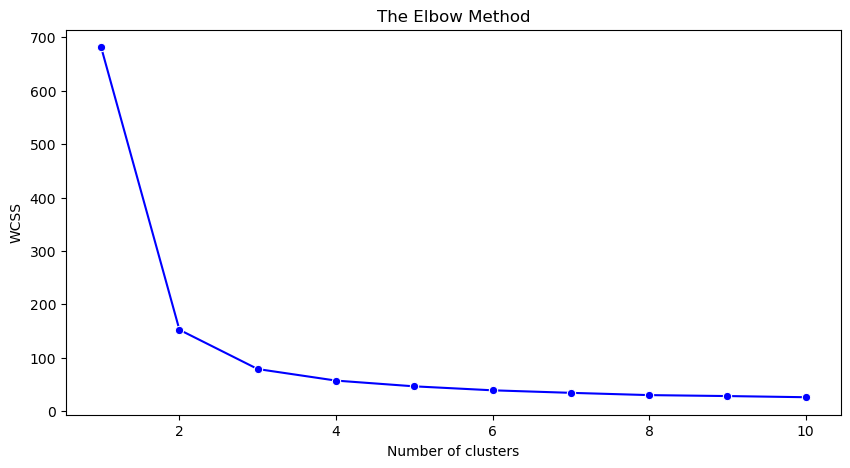

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting the features from the dataset
X = iris_df.drop('species', axis=1)

# Using the Elbow method to find a good number of clusters using WCSS (Within-Cluster-Sum-of-Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss, marker='o', color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



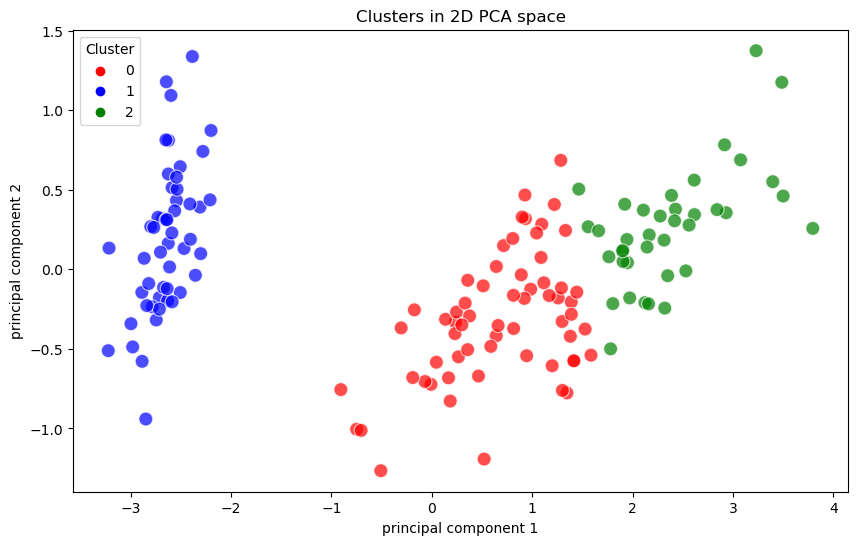

,principal component 1,principal component 2,Cluster,Species
0,-2.684126,0.319397,1,setosa
1,-2.714142,-0.177001,1,setosa
2,-2.888991,-0.144949,1,setosa
3,-2.745343,-0.318299,1,setosa
4,-2.728717,0.326755,1,setosa


In [4]:
from sklearn.decomposition import PCA

# Applying kmeans to the dataset with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clustered = kmeans.fit_predict(X)

# Visualizing the clusters in 2D space using the first two principal components of the data
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
principalDf['Cluster'] = clustered
principalDf['Species'] = iris_df['species']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Cluster', palette=['red', 'blue', 'green'], data=principalDf, s=100, alpha=0.7)
plt.title('Clusters in 2D PCA space')
plt.show()

# Returning the clustered DataFrame for further analysis if needed
principalDf.head()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Defining the features and target variable
X = iris_df.drop('species', axis=1)
y = iris.target

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initializing the Decision Tree Classifier and fitting the model to the training data
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results and evaluating the model
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00         6\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n')